# Import SQL script of opportunity youth to pandas

Outcome: 
    1. Opportunity youth table
    2. Opportunity youth table visualization 

## Import libraty

In [358]:
from sqlalchemy import create_engine
import pandas as pd

## Create engine

In [359]:
engine = create_engine("postgresql:///opportunity_youth")

## Declare SQL query as variables(three age range and total)

In [360]:
script1618 = """
/*
    Author:     Yu Fen Lin
    Date:       November 12, 2019
    Purpose:    Count the number of 2017 population in opportunity youth in South King County
                in defferent diploma
                age from 16 to 24                 
    Note: TODO: Could not show '3_Degree' = 0
*/
SELECT age1618.diploma AS degree, 
        --ROUND((count(*) / SUM(COUNT(*)) OVER()) * 100, 0) AS ratio_row_16_18, -- number of row
        --COUNT(*) AS row_16_18,
        SUM(age1618.pwgtp) As popluation_16_18,
        --SUM(SUM(age1618.pwgtp)) OVER()  AS total,
        ROUND(SUM(age1618.pwgtp) / (SUM(SUM(age1618.pwgtp)) OVER()) * 100,0) As ratio_16_18
FROM(
    SELECT pwgtp, --weight
        CASE 
            WHEN (schl BETWEEN '01' AND '15') THEN '0_No diploma'
            WHEN (schl BETWEEN '16' AND '17') THEN '1_HS or GED'
            WHEN (schl BETWEEN '18' AND '19') THEN '2_Some college'
            WHEN (schl BETWEEN '20' AND '24') THEN '3_Degree'
            ELSE '4_NA'
        END As diploma
    FROM pums_2017
    WHERE ((puma BETWEEN '11610' AND '11614') OR puma = '11604' OR puma = '11605') -- PUMA
    AND (agep BETWEEN 16 AND 18)
    AND sch = '1' -- No school enrollment
    AND (esr = '2' OR esr = '3' OR esr = '5' OR esr ='6') -- Not at work
    ) age1618

GROUP BY age1618.diploma
ORDER BY degree
"""

In [361]:
script1921 = """
/*
    Author:     Yu Fen Lin
    Date:       November 12, 2019
    Purpose:    Count the number of 2017 population in opportunity youth in South King County
                in defferent diploma
                age from 19 to 21                 
    Note:       
*/

SELECT age1921.diploma AS degree, 
        --ROUND((count(*) / SUM(COUNT(*)) OVER()) * 100, 0) AS ratio_row_19_21, -- number of row
        --COUNT(*) AS row_19_21,
        SUM(age1921.pwgtp) As popluation_19_21,
        --SUM(SUM(age1921.pwgtp)) OVER()  AS total,
        ROUND(SUM(age1921.pwgtp) / (SUM(SUM(age1921.pwgtp)) OVER()) * 100,0) As ratio_19_21
FROM(
    SELECT pwgtp,
        CASE 
            WHEN (schl BETWEEN '01' AND '15') THEN '0_No diploma'
            WHEN (schl BETWEEN '16' AND '17') THEN '1_HS or GED'
            WHEN (schl BETWEEN '18' AND '19') THEN '2_Some college'
            WHEN (schl BETWEEN '20' AND '24') THEN '3_Degree'
            ELSE '4_NA'
        END As diploma
    FROM pums_2017
    WHERE ((puma BETWEEN '11610' AND '11614') OR puma = '11604' OR puma = '11605') -- PUMA
    AND (agep BETWEEN 19 AND 21)
    AND sch = '1' -- No school enrollment
    AND (esr = '2' OR esr = '3' OR esr = '5' OR esr ='6') -- Not at work
    ) age1921
GROUP BY age1921.diploma
ORDER BY degree
"""

In [362]:
script2224 = """
/*
    Author:     Yu Fen Lin
    Date:       November 12, 2019
    Purpose:    Count the number of 2017 population in opportunity youth in South King County
                in defferent diploma
                age from 22 to 24                 
    Note:       
*/

SELECT age2224.diploma AS degree, 
        --ROUND((count(*) / SUM(COUNT(*)) OVER()) * 100, 0) AS ratio_row_22_24, -- number of row
        --COUNT(*) AS row_22_24,
        SUM(age2224.pwgtp) As popluation_22_24,
        --SUM(SUM(age2224.pwgtp)) OVER()  AS total,
        ROUND(SUM(age2224.pwgtp) / (SUM(SUM(age2224.pwgtp)) OVER()) * 100,0) As ratio_22_24
FROM(
    SELECT pwgtp,
        CASE 
            WHEN (schl BETWEEN '01' AND '15') THEN '0_No diploma'
            WHEN (schl BETWEEN '16' AND '17') THEN '1_HS or GED'
            WHEN (schl BETWEEN '18' AND '19') THEN '2_Some college'
            WHEN (schl BETWEEN '20' AND '24') THEN '3_Degree'
            ELSE '4_NA'
        END As diploma
    FROM pums_2017
    WHERE ((puma BETWEEN '11610' AND '11614') OR puma = '11604' OR puma = '11605') -- PUMA
    AND (agep BETWEEN 22 AND 24)
    AND sch = '1' -- No school enrollment
    AND (esr = '2' OR esr = '3' OR esr = '5' OR esr ='6') -- Not at work
    ) age2224
GROUP BY age2224.diploma
ORDER BY degree
"""

In [363]:
script_total = """
/*
    Author:     Yu Fen Lin
    Date:       November 12, 2019
    Purpose:    Count the number of 2017 population in opportunity youth in South King County
                in defferent diploma
                age from 16 to 24                
    Note:       
*/

SELECT age1624.diploma AS degree, 
        --ROUND((count(*) / SUM(COUNT(*)) OVER()) * 100, 0) AS ratio_row_22_24,
        --COUNT(*) AS row_22_24,
        SUM(age1624.pwgtp) As popluation_total,
        --SUM(SUM(age1624.pwgtp)) OVER()  AS total,
        ROUND(SUM(age1624.pwgtp) / (SUM(SUM(age1624.pwgtp)) OVER()) * 100,0) As ratio_total
FROM(
    SELECT pwgtp,
        CASE 
            WHEN (schl BETWEEN '01' AND '15') THEN '0_No diploma'
            WHEN (schl BETWEEN '16' AND '17') THEN '1_HS or GED'
            WHEN (schl BETWEEN '18' AND '19') THEN '2_Some college'
            WHEN (schl BETWEEN '20' AND '24') THEN '3_Degree'
            ELSE '4_NA'
        END As diploma
    FROM pums_2017
    WHERE ((puma BETWEEN '11610' AND '11614') OR puma = '11604' OR puma = '11605') -- PUMA
    AND (agep BETWEEN 16 AND 24)
    AND sch = '1' -- No school enrollment
    AND (esr = '2' OR esr = '3' OR esr = '5' OR esr ='6') -- Not at work
    ) age1624
GROUP BY age1624.diploma
ORDER BY degree
"""

## Read SQL variables as dataframe

In [371]:
# sqlpath1618 = 'sql/oy_16_18.sql'
# scriptFile1618 = open(sqlpath1618,'r')
# script1618 = scriptFile1618.read()
df1618 = pd.read_sql(script1618, con = engine)

# sqlpath1921 = 'sql/oy_19_21.sql'
# scriptFile1921 = open(sqlpath1921,'r')
# script1921 = scriptFile1921.read()
df1921 = pd.read_sql(script1921, con = engine)

# sqlpath2224 = 'sql/oy_22_24.sql'
# scriptFile2224 = open(sqlpath2224,'r')
# script2224 = scriptFile2224.read()
df2224 = pd.read_sql(script2224, con = engine)

# sqlpath_total = 'sql/oy_total.sql'
# scriptFile_total = open(sqlpath_total,'r')
# script_total = scriptFile_total.read()
df_total = pd.read_sql(script_total, con = engine)

## Combine four dataframe using pd.concat, set index, change columns names

In [372]:
df_oy_2017 = pd.concat([df1921.iloc[:,0:1], df1618.iloc[:,1:], df1921.iloc[:,1:], df2224.iloc[:,1:], df_total.iloc[:,1:]], axis=1)
# fill N/A value 0
df_oy_2017 = df_oy_2017.fillna(0) 
# set educational attainment as index
df_oy_2017['index'] = ['No diploma', 'HS diploma or GED', 'Some college, no degree', 'Degree (Associate or higher)']
df_oy_2017 = df_oy_2017.set_index('index')
del df_oy_2017['degree']
# change columns names
df_oy_2017.rename(columns={"popluation_16_18":"16-18 Population",
                           "ratio_16_18":"16-18 100%",
                           "popluation_19_21":"19-21 Population",
                           "ratio_19_21":"19-21 100%",
                           "popluation_22_24":"22-24 Population",
                           "ratio_22_24":"22-24 100%",
                           "popluation_total":"Total Population",
                           "ratio_total":"Total 100%",
                          }, inplace = True)


In [373]:
df_oy_2017

,16-18 Population,16-18 100%,19-21 Population,19-21 100%,22-24 Population,22-24 100%,Total Population,Total 100%
index,,,,,,,,
No diploma,1083.0,54.0,1210.0,28.0,1488.0,26.0,3781.0,31.0
HS diploma or GED,790.0,39.0,2312.0,54.0,2284.0,40.0,5386.0,45.0
"Some college, no degree",143.0,7.0,712.0,16.0,1275.0,22.0,2130.0,18.0
Degree (Associate or higher),0.0,0.0,86.0,2.0,648.0,11.0,734.0,6.0


## Export opportunity youth table as csv file

In [113]:
#df_oy_2017.to_csv(r'data/oy_table_2017.csv')

## Import population and opportunity youth table of 2014

In [9]:
total_2014 = {'16-18': [2805, 587, 46661], 
       '19-21': [7284, 2049, 32318], 
       '22-24': [8728, 2877, 36426]}
df_total_2014 = pd.DataFrame(data=total_2014, index = ['Opportunity Youth', 'Working Without Diploma', 'Not An Opportunity Youth'])

In [ ]:
oy_2014 = {'16-18': [1610, 985, 179, 31], 
       '19-21': [2048, 3349, 1666, 221], 
       '22-24': [1981, 3067, 1763, 1917]}
df_oy_2014 = pd.DataFrame(data=oy_2014, index = ['No diploma', 'HS diploma or GED', 'Some college, no degree', 'Degree (Associate or higher)'])

In [256]:
df_oy_2014['Total'] = df_oy_2014['16-18'] + df_oy_2014['19-21'] + df_oy_2014['22-24']

In [313]:
df_oy_2014['16-18 100%'] = round(df_oy_2014['16-18']*100 / df_oy_2014['16-18'].sum(),0)
df_oy_2014['19-21 100%'] = round(df_oy_2014['19-21']*100 / df_oy_2014['19-21'].sum(),0)
df_oy_2014['22-24 100%'] = round(df_oy_2014['22-24']*100 / df_oy_2014['22-24'].sum(),0)
df_oy_2014['Total 100%'] = round(df_oy_2014['Total']*100 / df_oy_2014['Total'].sum(),0)

In [375]:
df_oy_2014

,16-18,19-21,22-24,Total,16-18 100%,19-21 100%,22-24 100%,Total 100%
No diploma,1610,2048,1981,5639,57.0,28.0,23.0,30.0
HS diploma or GED,985,3349,3067,7401,35.0,46.0,35.0,39.0
"Some college, no degree",179,1666,1763,3608,6.0,23.0,20.0,19.0
Degree (Associate or higher),31,221,1917,2169,1.0,3.0,22.0,12.0


In [314]:
df_oy_2014

,16-18,19-21,22-24,Total,16-18 100%,19-21 100%,22-24 100%,Total 100%
No diploma,1610,2048,1981,5639,57.0,28.0,23.0,30.0
HS diploma or GED,985,3349,3067,7401,35.0,46.0,35.0,39.0
"Some college, no degree",179,1666,1763,3608,6.0,23.0,20.0,19.0
Degree (Associate or higher),31,221,1917,2169,1.0,3.0,22.0,12.0


In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [83]:
df_1618 = pd.concat([df_oy_2014.iloc[:,0],df_oy_2017.iloc[:,0]], axis=1)

In [93]:
df_1618.rename(columns={"16-18":"2010-2014","popluation_16_18":2017}, inplace = True)

In [94]:
df_1618

,2010-2014,2017
index,,
No diploma,1610,1083.0
HS diploma or GED,985,790.0
"Some college, no degree",179,143.0
Degree (Associate or higher),31,0.0


In [335]:
df_oy_diff_percent = pd.DataFrame()
col_list =['16-18 100%', '19-21 100%', '22-24 100%', 'Total 100%']
for col in col_list:
    df_oy_diff_percent[col.replace(" 100%", "")] = df_oy_2017[col]- df_oy_2014[col]
df_oy_diff_percent

,16-18,19-21,22-24,Total
index,,,,
No diploma,-3.0,0.0,3.0,1.0
HS diploma or GED,4.0,8.0,5.0,6.0
"Some college, no degree",1.0,-7.0,2.0,-1.0
Degree (Associate or higher),-1.0,-1.0,-11.0,-6.0


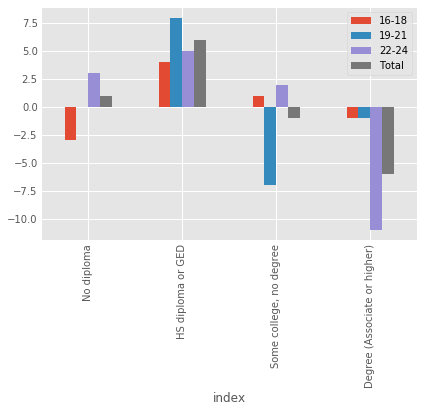

In [345]:
df_oy_diff_percent.plot.bar();

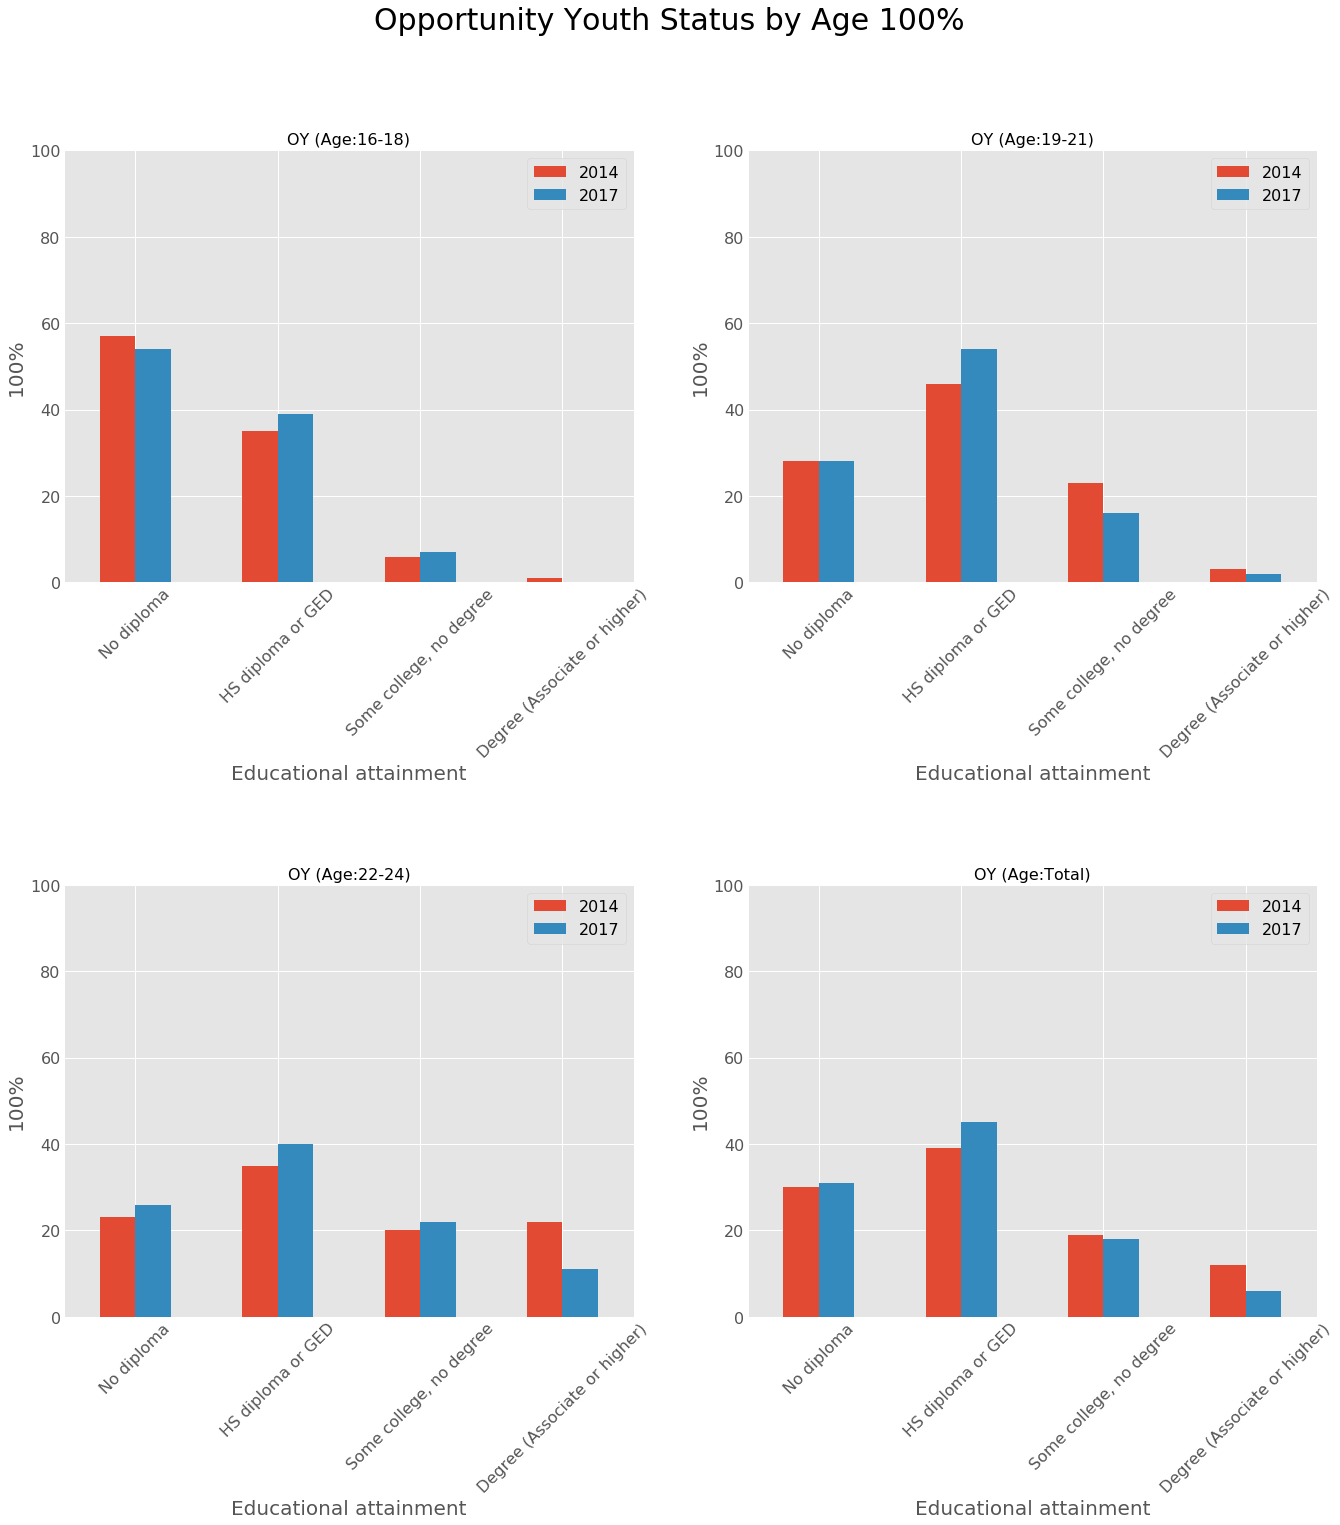

In [326]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Opportunity Youth Status by Age 100%', fontsize=30)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

for i in range(0,4):
#     subplot row and column
    row = (i)//2
    col = i%2
    ax = axes[row][col]
    
#     import data needed
    df = pd.concat([df_oy_2014.iloc[:,i+4],df_oy_2017.iloc[:,2*i+1]], axis=1)
    df.plot.bar(ax=ax, fontsize=16)
#     ax.invert_yaxis()
    
#     age group title
    title = df_oy_2014.columns[i]
#     set title of each axes in different age 
    ax.set_title("OY (Age:"+title+")".format(n), fontsize=16)
#     set x and y label
    ax.set_xlabel('Educational attainment', fontsize=20)
    ax.set_ylabel('100%', fontsize=20)
#     legend
    ax.legend(['2014','2017'], fontsize=16)
#     rotate x labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
#     y axis limit
    ax.set_ylim(0, 100)
#     axfig=axs.get_figure()
#     axfig.savefig('OY_'+title+'.png')
    
    
    
fig.savefig('oy_table.png' )

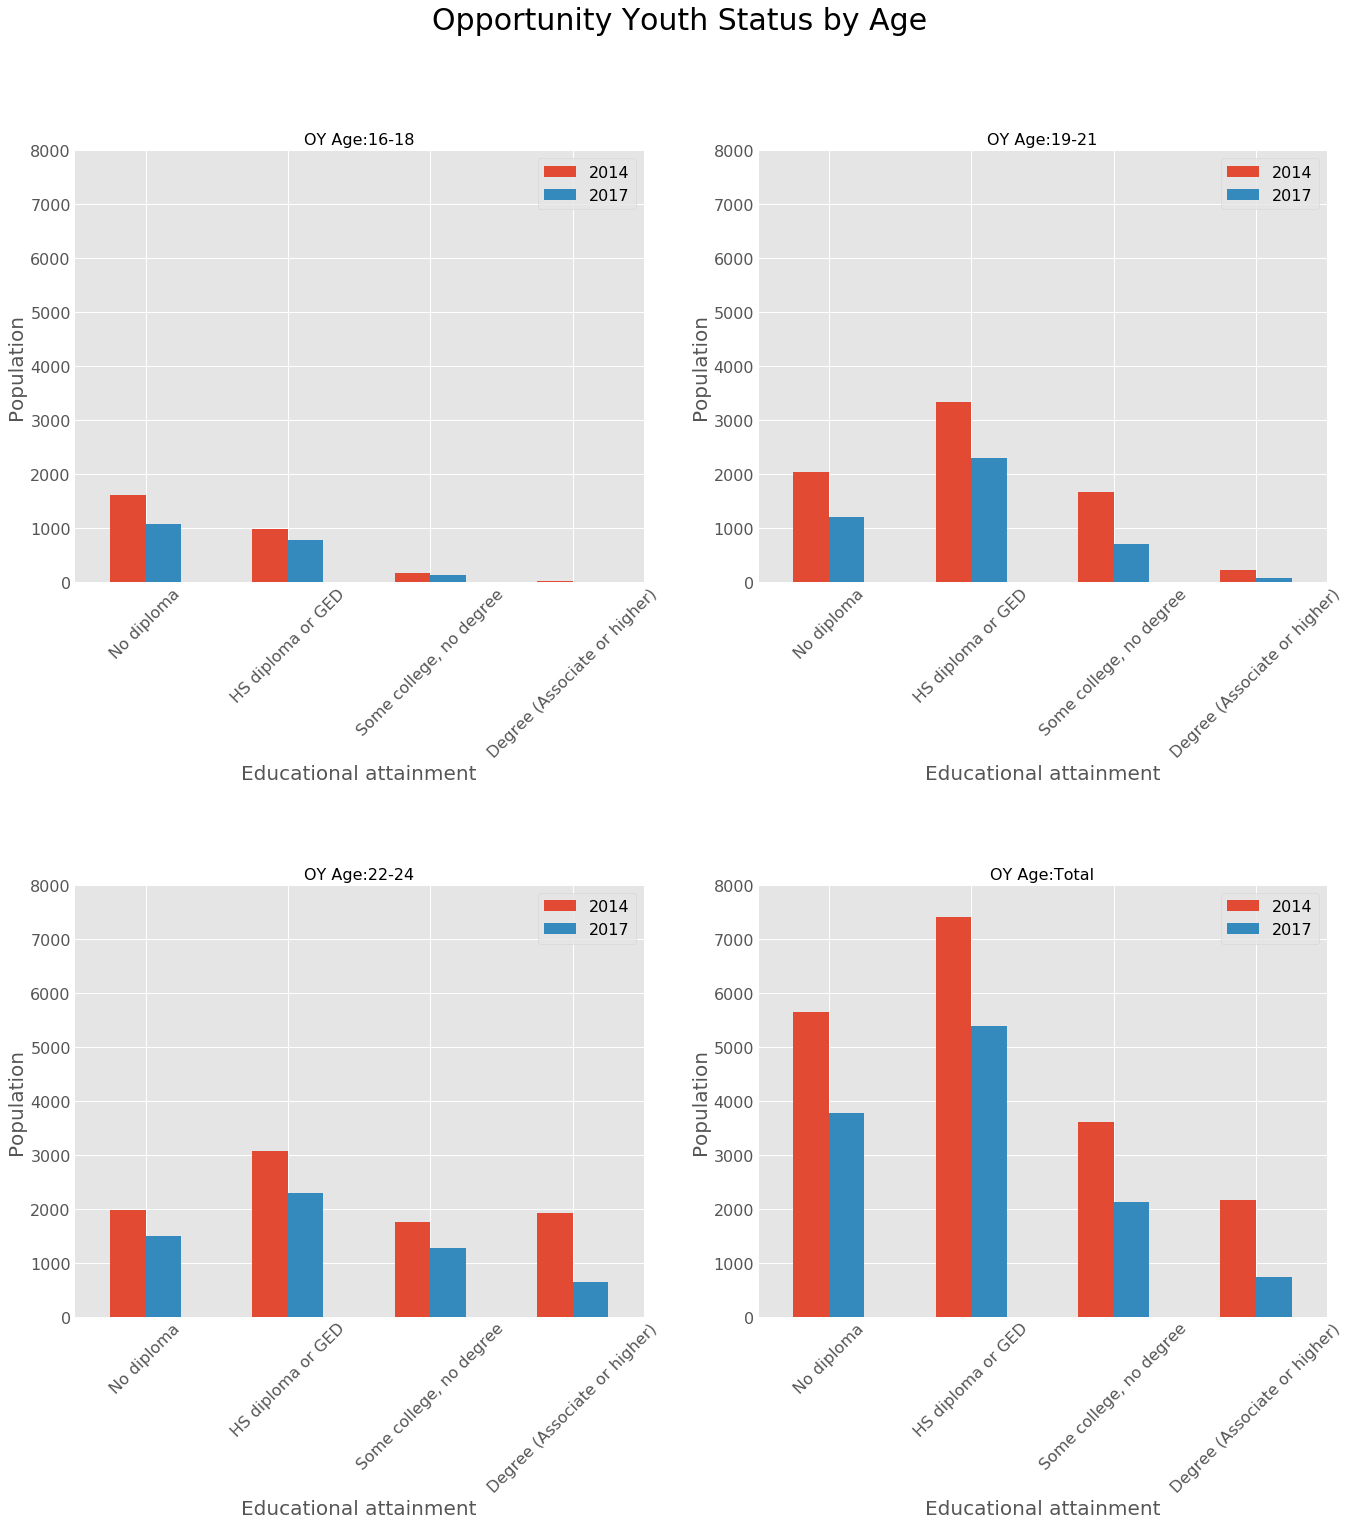

In [299]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.suptitle('Opportunity Youth Status by Age', fontsize=30)
plt.subplots_adjust(wspace=0.2, hspace=0.7)

for i in range(0,4):
#     subplot row and column
    row = (i)//2
    col = i%2
    ax = axes[row][col]
    
#     import data needed
    df = pd.concat([df_oy_2014.iloc[:,i],df_oy_2017.iloc[:,2*i]], axis=1)
    df.plot.bar(ax=ax, fontsize=16)
#     ax.invert_yaxis()
    
#     age group title
    title = df_oy_2014.columns[i]
#     set title of each axes in different age 
    ax.set_title("OY Age:"+title.format(n), fontsize=16)
#     set x and y label
    ax.set_xlabel('Educational attainment', fontsize=20)
    ax.set_ylabel('Population', fontsize=20)
#     legend
    ax.legend(['2014','2017'], fontsize=16)
#     rotate x labels
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
#     y axis limit
    ax.set_ylim(0, 8000)
    

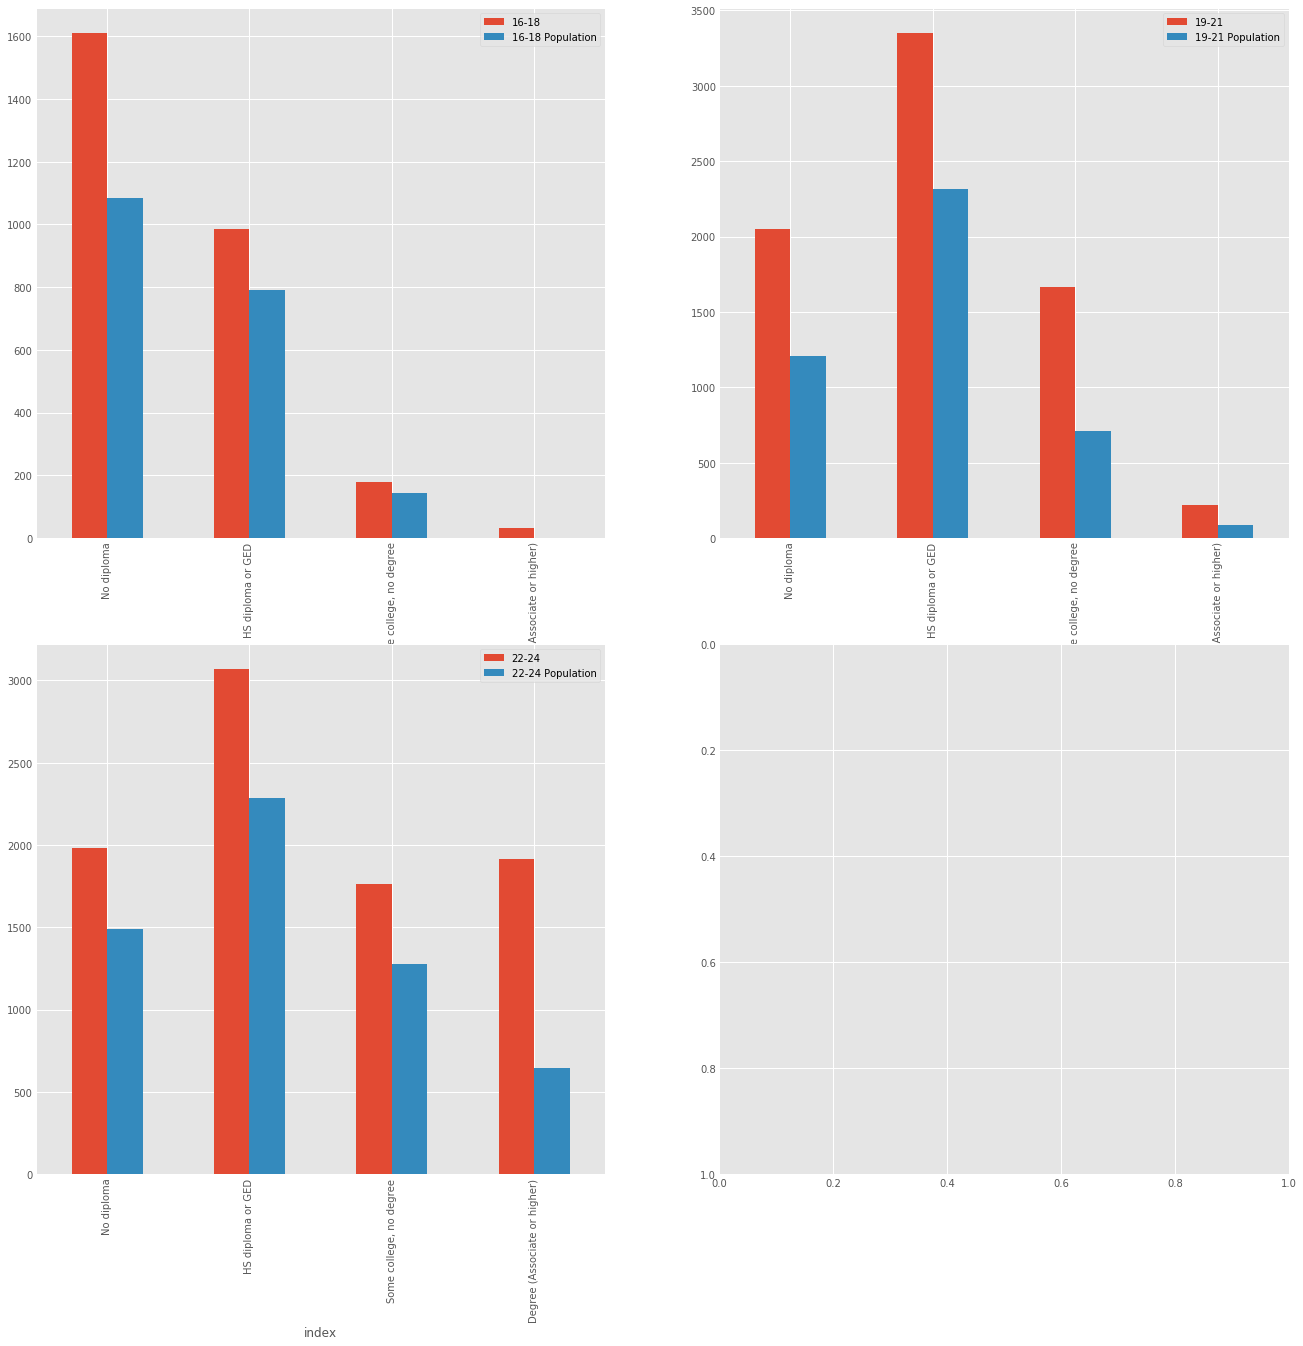

In [268]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
for i in range(0,3):
    x_title = df_oy_2017.columns[2*i]
    df = pd.concat([df_oy_2014.iloc[:,i],df_oy_2017.iloc[:,2*i]], axis=1)
    row = (i)//2
    col = i%2
#     print("row:",row," col:",col)
    ax = axes[row][col]
    df.plot.bar(ax=ax)
    plt.gca().invert_yaxis()
    
    #ax.plot(kind="bar")
    #ax = plt.barh(df)
    #ax.set_title(x_title.format(n))
    #ax.plot(x,y,lw=5)
    #ax.set_xlim(0, 100)
    #ax.set_ylim(0, 1200)
    #ax.set_title('{}*x'.format(n))

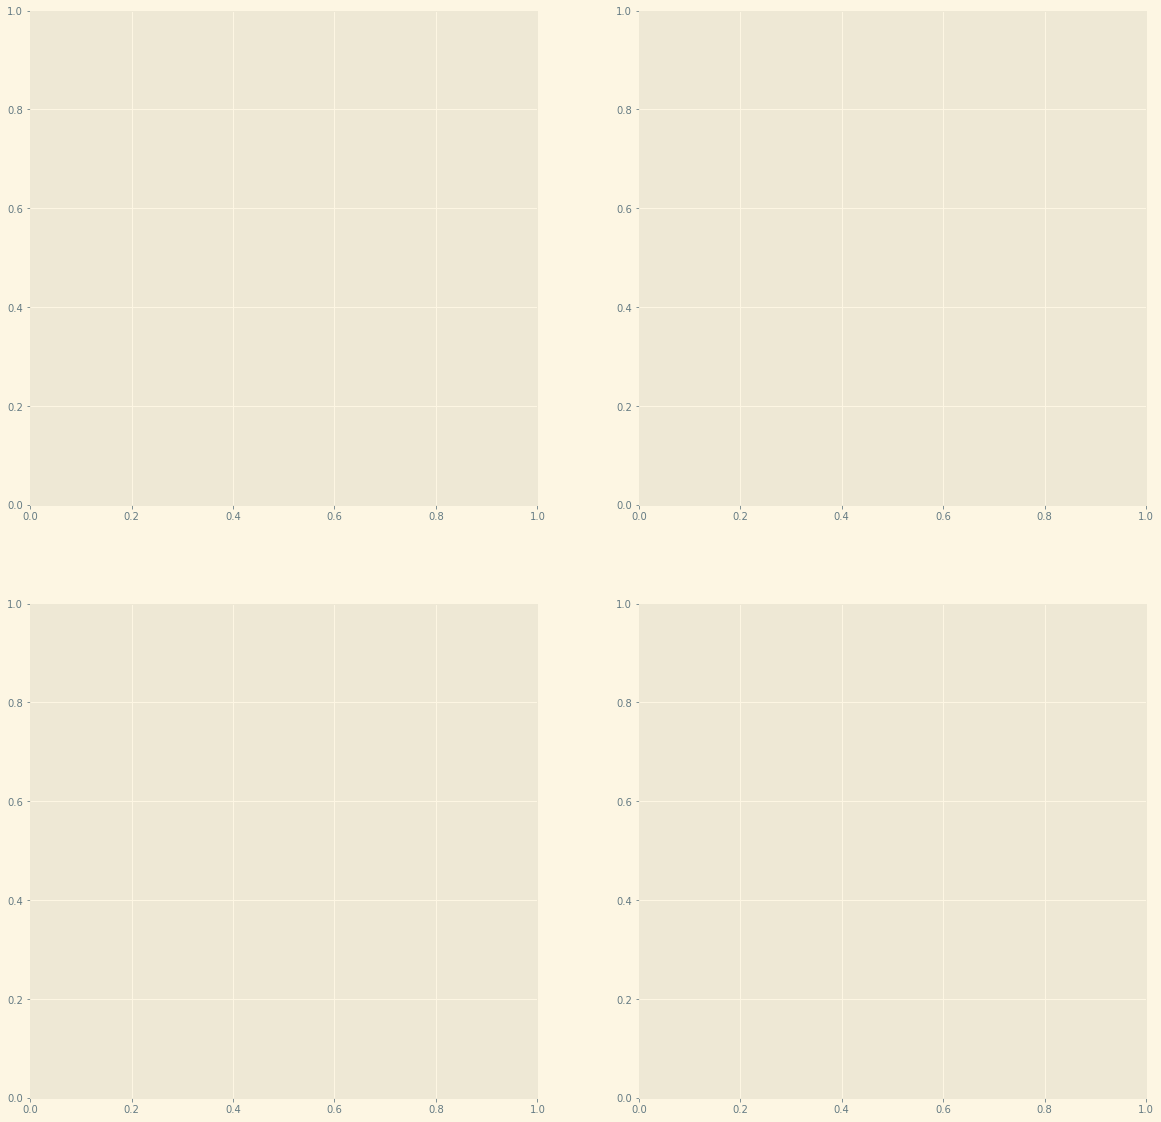

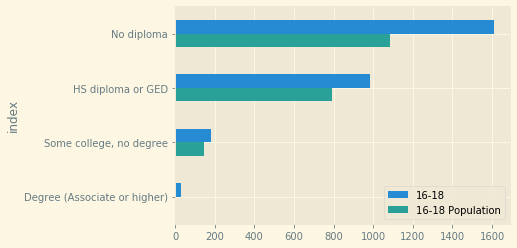

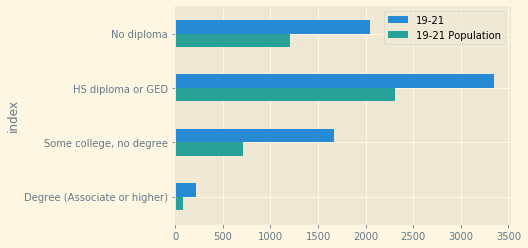

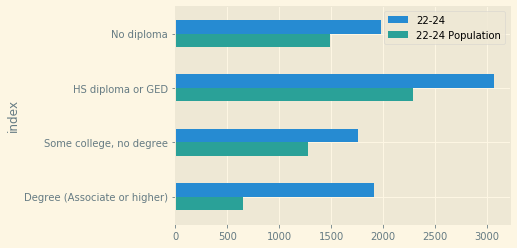

In [233]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
for i in range(0,3):
    #row = (i)//2
    #col = i%2
    #print("row:",row," col:",col)
    #ax = axes[row][col]
    
    x_title = df_oy_2017.columns[2*i]
    #y_title = df_oy_2017.index[row]
    df = pd.concat([df_oy_2014.iloc[:,i],df_oy_2017.iloc[:,2*i]], axis=1)
    #print(df)
    df.plot.barh()
    plt.gca().invert_yaxis()
    
    
    
    
    #ax.plot(kind="bar")
    #ax = plt.barh(df)
    #ax.set_title(x_title.format(n))
    #ax.plot(x,y,lw=5)
    #ax.set_xlim(0, 100)
    #ax.set_ylim(0, 1200)
    #ax.set_title('{}*x'.format(n))

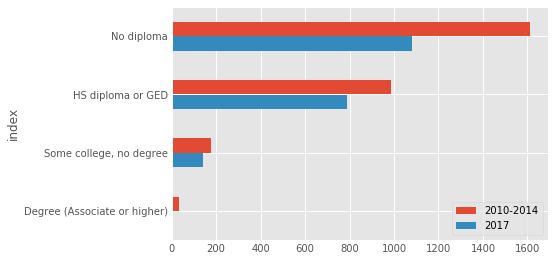

In [241]:
df_1618.plot(kind="barh")
plt.gca().invert_yaxis();

In [240]:
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')